# Multi-parametric OLS
The multiprarmetric linear regression is a training procedure based on a linear model. The model makes a prediction by simply computing a weighted sum of the input features, plus a constant term called the bias term (also called the intercept term):

$$ \hat{y}=\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n$$

This new model includes $\theta_n$ unknown parameter. Thus, the model can be writen more easy by using vector notation form for $m$ instances. 
Therefore, the model will become in matrix form $Y=X\times\theta$:

$$ 
\begin{bmatrix} 
    \hat{y}^0 \\ 
    \hat{y}^1\\ 
    \hat{y}^2\\ 
    \vdots \\ 
    \hat{y}^m 
\end{bmatrix} 
= 
\begin{bmatrix} 
    1 & x_1^0 & x_2^0 & \cdots & x_n^0\\ 
    1 & x_1^1 & x_2^1 & \cdots & x_n^1\\
    1 & x_1^2 & x_2^2 & \cdots & x_n^2\\
    \vdots & \vdots & \vdots &\cdots& \vdots\\
    1 & x_0^m & x_1^m & \cdots &x_n^m 
\end{bmatrix} 
\begin{bmatrix} 
    \theta_0 \\ 
    \theta_1 \\ 
    \theta_2 \\ 
    \vdots \\ 
    \theta_n 
\end{bmatrix} $$ 
Resulting:

$$\hat{y}= h_\theta(x) = x \theta $$

Now that we have our model, how do we train it?

Please, consider that training the model means adjusting the parameters to reduce the error or minimizing the cost function. 
The most common performance measure of a regression model is the Mean Square Error (MSE). Therefore, to train a Linear Regression model, you need to find the value of $\theta$ that minimizes the MSE:

$$J = MSE(X,h_\theta) = \frac{1}{m} \sum_{i=1}^{m} \left(\hat{y}^{(i)}-y^{(i)} \right)^2$$

$$J = MSE(X,h_\theta) = \frac{1}{m} \sum_{i=1}^{m} \left( x^{(i)}\theta-y^{(i)} \right)^2$$

$$J = MSE(X,h_\theta) = \frac{1}{m} \left( x\theta-y \right)^T \left( x\theta-y \right)$$

# The normal equation

To find the value of $\theta$ that minimizes the cost function, there is a closed-form solution that gives the result directly. 
This is called the Normal Equation; and can be find it by derivating the MSE equation as a function of $\theta$ and making it equals to zero:

$$\hat{\theta} = (X^T X)^{-1} X^{T} y $$

In [1]:
import pandas as pd
df =  pd.read_csv('dataset1.csv')
x1 = df['X1']
df

X1        X2          y
0   3.745401  0.314292   9.247570
1   9.507143  6.364104  16.257728
2   7.319939  3.143560  16.258844
3   5.986585  5.085707   6.359638
4   1.560186  9.075665  -9.739221
..       ...       ...        ...
95  4.937956  3.492096   6.523018
96  5.227328  7.259557  28.761328
97  4.275410  8.971103  -4.306011
98  0.254191  8.870864 -19.500923
99  1.078914  7.798755 -10.525044

[100 rows x 3 columns]

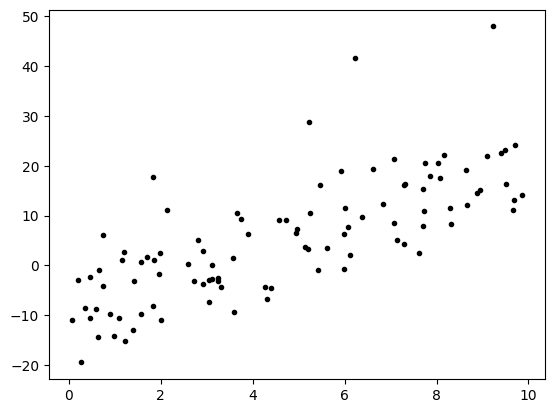

In [2]:
import matplotlib.pyplot as plt
x1 = df['X1']
x2 = df['X2']
y = df['y']
plt.plot(x1,y, '.k')
plt.show()

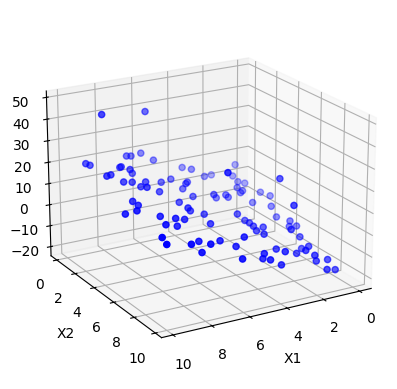

In [11]:
# Create figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(x1, x2, y, c='blue', marker='o')
ax.view_init(elev=20, azim=60)  # adjust camera

# Axis labels
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Y")

plt.show()

# The normal equation

In [5]:
import numpy as np
from numpy.linalg import inv 
x0 = np.ones(len(x1)) 
X = np.c_[x0,x1,x2]
thetaH = np.dot(inv(X.T@X), X.T@y)
thetaH

array([ 0.85319677,  2.98010241, -1.871685  ])

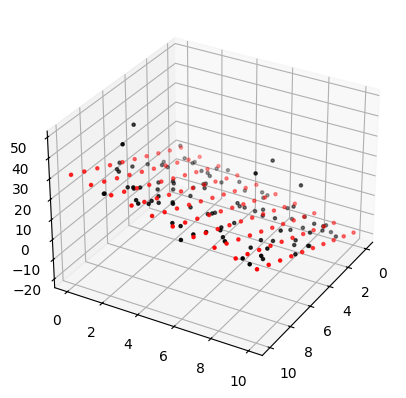

In [6]:
x1New = np.linspace(0,10,10)
x2New= np.linspace(0,10,10)
x1NewG, x2NewG = np.meshgrid(x1New, x2New)
yModel = thetaH[0]+thetaH[1]*x1NewG+thetaH[2]*x2NewG

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1NewG, x2NewG, yModel, c='red', marker='.')
ax.scatter(x1, x2, y, c='black', marker='.')
ax.view_init(elev=30, azim=30)  # adjust camera
plt.show()

# Batch Gradient Descent

$$\theta_{new} = \theta_{old}-\eta \nabla_\theta$$
$$\nabla_\theta = \frac{2}{m}X^T(X\theta-y)$$

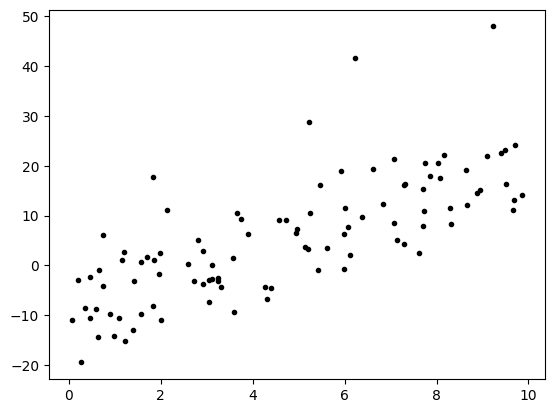

In [7]:
plt.plot(x1,y, '.k', label="data")
plt.show()

In [22]:
#bgd:
X = np.c_[np.ones_like(x1), x1]
y = np.array(y, ndmin=2).reshape(-1,1)
np.random.seed(67)
n = 1000
m = len(y)
eta = 0.0001
thetaH = np.array([[10],[9]])
thetaH

array([[10],
       [ 9]])

-=-=-=-=-=-=
[[9.99064619]
 [8.94558151]]
-=-=-=-=-=-=
[[9.2750177 ]
 [4.93169627]]
-=-=-=-=-=-=
[[8.85060396]
 [2.80897556]]
-=-=-=-=-=-=
[[8.58094375]
 [1.68958788]]
-=-=-=-=-=-=
[[8.39363522]
 [1.10248799]]
-=-=-=-=-=-=
[[8.25026369]
 [0.79775963]]
-=-=-=-=-=-=
[[8.13044659]
 [0.64280814]]
-=-=-=-=-=-=
[[8.02336849]
 [0.56728464]]
-=-=-=-=-=-=
[[7.92328982]
 [0.53386527]]
-=-=-=-=-=-=
[[7.82716409]
 [0.52274774]]
Final values:
[[7.73430322]
 [0.52338189]]


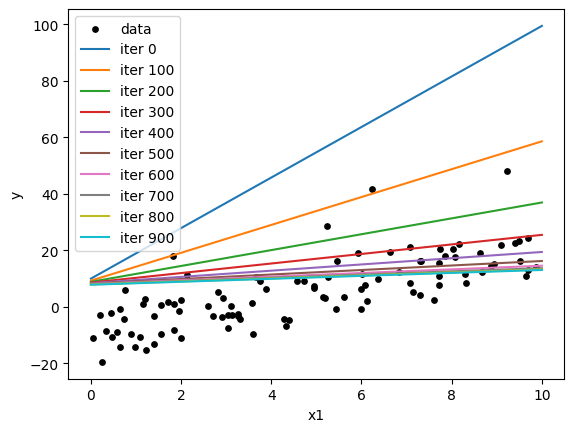

In [29]:
thetaH = np.array([[10],[9]])
x1New = np.linspace(0,10,2)
plt.scatter(x1, y, color="k", s=15, label="data")
#yModel = thetaH[0]+thetaH[1]*x1New
#plt.plot(x1New, yModel, '-g', label="zero")
for iter in range(n):
    nabla = 2/m * X.T@(X@thetaH-y)
    thetaH = thetaH-eta*nabla
    if iter % 100 == 0:
        yModel = thetaH[0]+thetaH[1]*x1New
        plt.plot(x1New,yModel, label=f"iter {iter}")
        print("-=-=-=-=-=-=")
        print(thetaH)
print("Final values:")
print(thetaH) 
plt.xlabel("x1")
plt.ylabel("y")
plt.legend()
plt.show()

# History

Initial values
[[ 0.47298583]
 [-0.68142588]]
Final values:
[[-3.25986811]
 [ 2.19754312]]


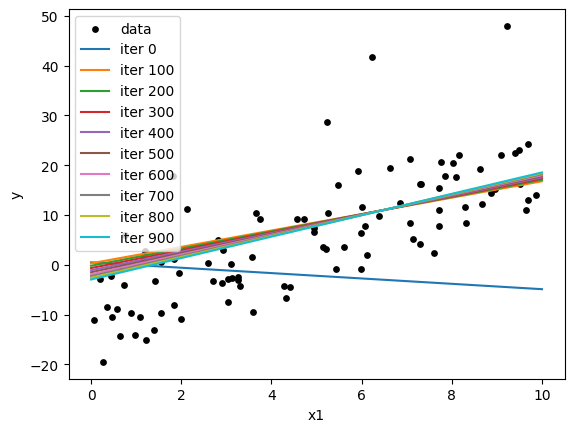

In [99]:
np.random.seed(12)
thetaH = np.random.randn(2,1)
print("Initial values")
print(thetaH)
thetas = np.zeros((n,2))
J_hist = np.zeros((n,1))
thetas[0] =  thetaH.ravel()
x1New = np.linspace(0,10,2)
plt.scatter(x1, y, color="k", s=15, label="data")
for iter in range(n):
    nabla = 2/m * X.T@(X@thetaH-y)
    thetaH = thetaH-eta*nabla
    thetas[iter] = thetaH.ravel()
    J = (1/m*(X@thetaH - y).T@(X@thetaH - y))
    # print("J init")
    # print(J)
    J_hist[iter] = J
    if iter % 100 == 0:
        yModel = thetaH[0]+thetaH[1]*x1New
        plt.plot(x1New,yModel, label=f"iter {iter}")
        # print("-=-=-=-=-=-=")
        # print(thetaH)
print("Final values:")
print(thetaH) 
plt.xlabel("x1")
plt.ylabel("y")
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

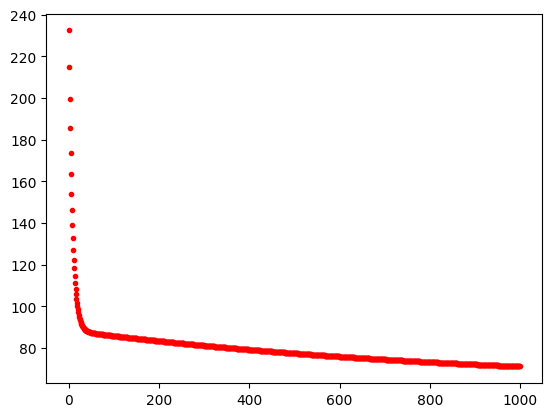

In [100]:
plt.plot(J_hist,'.r')
plt.show

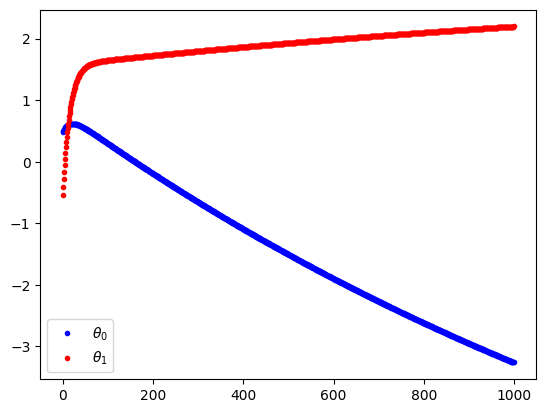

In [107]:
plt.plot(thetas[:,0], '.b', label=r"$\theta_0$")
plt.plot(thetas[:,1], '.r', label=r"$\theta_1$")
plt.legend()
plt.show()

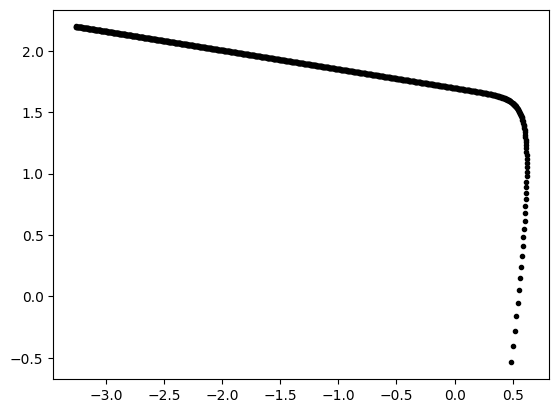

In [ ]:
plt.plot(thetas[:,0], thetas[:,1], '.k')
plt.show()

In [115]:
J_hist.shape

(1000, 1)

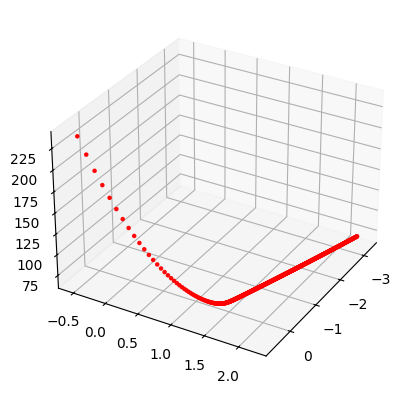

In [116]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(thetas[:,0], thetas[:,1], J_hist[:,0], c='red', marker='.')
ax.view_init(elev=30, azim=30)  # adjust camera
plt.show()